<b style="color:green">
    <h3>Yapılan işlemler özeti</h3>
<ul>
    <li>df1 ve df2 tabloları birleştirildi</li>
    <li> Oluşan yeni tablo(df) de gerekli olan string dönüştürmeleri, ayırmaları yapılarak get_dummies işlemi yapıldı</li>
    <li>df tablosunda 891. satıra kadar Survived alanı dolu ve 891. satırdan sonra boş olan Survived alanları için ayrı ayrı işlemler yapıldı</li>
    <li>Survived alanı dolu olan satırlar(toplam 891 satır) 0.2 oranında test ve train olarak ayrıldı ve pit ve predict işlemi uygulanarak classifier tablosu oluşturuldu.</li>
    <li>f1_score değeri yüksek olan (en yüksek 0.81 ile DecisionTreeClassifier) ve 3 tane de ondan düşük olan 
tahminler listelendi</li>
    <li>Son olarak DecisionTreeClassifier tarafından oluşturulan tahmin tabloya eklendi ve dosya kaydedildi</li>
    </ul>
</b>    

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

In [55]:
df1,df2=pd.read_csv('ttrain.csv'),pd.read_csv('ttest.csv')

In [56]:
df1.shape,df2.shape

((891, 12), (418, 11))

In [57]:
df=df1.append(df2)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [59]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [60]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
794,795,0.0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
839,840,1.0,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
345,1237,NaN,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S
623,624,0.0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S


In [61]:
df.Name.value_counts()

Kelly, Mr. James                                           2
Connolly, Miss. Kate                                       2
Madill, Miss. Georgette Alexandra                          1
Mineff, Mr. Ivan                                           1
Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)       1
                                                          ..
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)    1
Birkeland, Mr. Hans Martin Monsen                          1
Goodwin, Miss. Jessie Allis                                1
Skoog, Miss. Mabel                                         1
Canavan, Mr. Patrick                                       1
Name: Name, Length: 1307, dtype: int64

In [62]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Dr','Major','Col','Capt','Sir','Rev','Jonkheer','Don'],'Mr')

In [63]:
df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [64]:
df['Senior']=df['Age'].map(lambda s:1 if s>70 else 0)

In [65]:
df['Senior'].value_counts()

0    1303
1       6
Name: Senior, dtype: int64

In [66]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Senior            0
dtype: int64

In [67]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [68]:
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'),inplace=True)
df.groupby('Title')['Age'].median()

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Senior       1309 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [70]:
del df['Cabin']

In [71]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [72]:
df['Family']=df['SibSp']+df['Parch']+1 #aileyi annebaba ve kendisi ile doldurduk

<AxesSubplot:xlabel='Embarked', ylabel='count'>

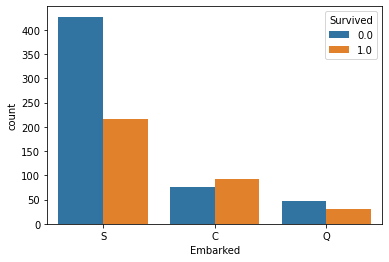

In [73]:
sns.countplot(df['Embarked'],hue=df['Survived'])

In [74]:
df['Embarked']=df['Embarked'].fillna('S')

<AxesSubplot:xlabel='Age', ylabel='Count'>

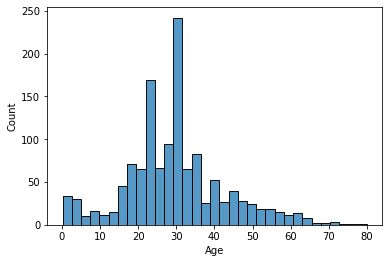

In [75]:
sns.histplot(df['Age'])

In [76]:
df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [77]:
df1.shape

(891, 12)

In [78]:
df.drop(['Ticket'],axis=1,inplace=True)

In [79]:
df=pd.get_dummies(df,drop_first=True)

In [80]:
x,y=df[:891].drop('Survived',axis=1),df[:891][['Survived']]

In [81]:
predict_df2_survived=df[891:].drop('Survived',axis=1)
predict_df2_survived.shape

(418, 1320)

In [82]:
#x=pd.get_dummies(x,drop_first=True)
x.shape, y.shape

((891, 1320), (891, 1))

In [83]:
def classification_funct(x,y,predict_df2_survived):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)
       
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        print("\n {} confusion_matrix".format(item))
        print(confusion_matrix(y_test,item.predict(x_test)))
        print("\n {} classification_report".format(item))
        print(classification_report(y_test,item.predict(x_test)))

        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
      
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    
    
    classification_funct.predict1_df2_survived=Log.predict(predict_df2_survived)
    classification_funct.predict2_df2_survived=D.predict(predict_df2_survived)
    classification_funct.predict3_df2_survived=R.predict(predict_df2_survived)
    classification_funct.predict4_df2_survived=b.predict(predict_df2_survived)


In [84]:
classification_funct(x,y,predict_df2_survived)


 GaussianNB() confusion_matrix
[[  0 110]
 [  0  69]]

 GaussianNB() classification_report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       110
         1.0       0.39      1.00      0.56        69

    accuracy                           0.39       179
   macro avg       0.19      0.50      0.28       179
weighted avg       0.15      0.39      0.21       179


 BernoulliNB() confusion_matrix
[[93 17]
 [15 54]]

 BernoulliNB() classification_report
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       110
         1.0       0.76      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


 KNeighborsClassifier() confusion_matrix
[[85 25]
 [44 25]]

 KNeighborsClassifier() classification_report
              precision    recall  f1-score   support

 

In [85]:
classification_funct.result

,f1_score,recall_score,precision_score,accuracy_score
DecisionTreeClassifier,0.800000,0.782609,0.818182,0.849162
LogisticRegression,0.800000,0.811594,0.788732,0.843575
RandomForestClassifier,0.797101,0.797101,0.797101,0.843575
BernoulliNB,0.771429,0.782609,0.760563,0.821229
XGBClassifier,0.750000,0.739130,0.761194,0.810056
GaussianNB,0.556452,1.000000,0.385475,0.385475
KNeighborsClassifier,0.420168,0.362319,0.500000,0.614525
SVC,0.177215,0.101449,0.700000,0.636872


<AxesSubplot:>

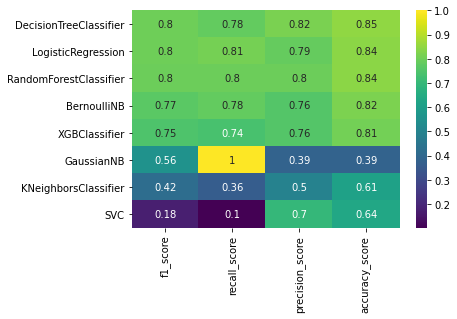

In [86]:
sns.heatmap(classification_funct.result,cmap='viridis',annot=True)

In [87]:
classification_funct.predict2_df2_survived.shape

(418,)

In [88]:
#En iyi 1. dönen DecisionTreeClassifier  (0.81)
classification_funct.predict2_df2_survived

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [89]:
#En iyi 2. dönen  LogisticRegression (0.8)
classification_funct.predict1_df2_survived

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [90]:
#En iyi 3. dönen RandomForestClassifier (0.79)
classification_funct.predict3_df2_survived

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [91]:
#En 4. olarak dönen BernoulliNB (0.77)
classification_funct.predict4_df2_survived

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [92]:
df['Survived'][891:]=classification_funct.predict1_df2_survived #en iyi olan LogisticRegression tabloya eklendi

In [93]:
df.sample(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,"Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Master. Philip Frank","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Aldworth, Mr. Charles Augustus","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mr. Hudson Joshua Creighton","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen, Mr. Albert Karvin","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ida Augusta Margareta","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mr. Johan Samuel","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)",...,"Name_Wiklund, Mr. Jakob Alfred","Name_Wiklund, Mr. Karl Johan","Name_Wilhelms, Mr. Charles","Name_Wilkes, Mrs. James (Ellen Needs)","Name_Willard, Miss. Constance","Name_Willer, Mr. Aaron (Abi Weller"")""","Name_Willey, Mr. Edward","Name_Williams, Mr. Charles Duane","Name_Williams, Mr. Charles Eugene","Name_Williams, Mr. Howard Hugh ""Harry""","Name_Williams, Mr. Leslie","Name_Williams, Mr. Richard Norris II","Name_Williams-Lambert, Mr. Fletcher Fellows","Name_Wilson, Miss. Helen Alice","Name_Windelov, Mr. Einar","Name_Wirz, Mr. Albert","Name_Wiseman, Mr. Phillippe","Name_Wittevrongel, Mr. Camille","Name_Woolner, Mr. Hugh","Name_Wright, Miss. Marion","Name_Wright, Mr. George","Name_Yasbeck, Mr. Antoni","Name_Yasbeck, Mrs. Antoni (Selini Alexander)","Name_Young, Miss. Marie Grice","Name_Youseff, Mr. Gerious","Name_Yousif, Mr. Wazli","Name_Yousseff, Mr. Gerious","Name_Yrois, Miss. Henriette (""Mrs Harbeck"")","Name_Zabour, Miss. Hileni","Name_Zabour, Miss. Thamine","Name_Zakarian, Mr. Mapriededer","Name_Zakarian, Mr. Ortin","Name_Zimmerman, Mr. Leo","Name_de Brito, Mr. Jose Joaquim","Name_de Messemaeker, Mr. Guillaume Joseph","Name_de Messemaeker, Mrs. Guillaume Joseph (Emma)","Name_de Mulder, Mr. Theodore","Name_de Pelsmaeker, Mr. Alfons","Name_del Carlo, Mr. Sebastiano","Name_del Carlo, Mrs. Sebastiano (Argenia Genovesi)","Name_van Billiard, Master. James William","Name_van Billiard, Master. Walter John","Name_van Billiard, Mr. Austin Blyler","Name_van Melkebeke, Mr. Philemon",Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
39,40,1.0,3,14.0,1,0,11.2417,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
135,1027,0.0,3,24.0,0,0,7.8542,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
63,64,0.0,3,4.0,3,2,27.9000,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
207,208,1.0,3,26.0,0,0,18.7875,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

<AxesSubplot:xlabel='Survived', ylabel='count'>

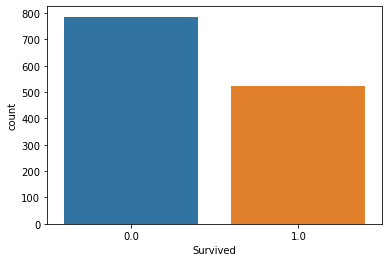

In [94]:
sns.countplot(df['Survived'])

In [95]:
df['Survived'].value_counts()

0.0    786
1.0    523
Name: Survived, dtype: int64

In [96]:
dosya_indir=df.to_csv('Titanic_Result.csv')

In [101]:
submission=pd.DataFrame()
submission['PassengerId']=df['PassengerId'][891:]
submission['Survived']=classification_funct.predict2_df2_survived
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [102]:
submission['Survived']=submission['Survived'].astype(int)

In [103]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [104]:
submission.to_csv("TitanicD.csv",index=False)